In [1]:
import torch


In [2]:
image = torch.randn(480, 640).clamp(0, 1)

In [3]:
image

tensor([[0.6348, 0.0000, 0.0000,  ..., 0.0000, 0.8568, 0.0000],
        [0.0000, 0.0000, 1.0000,  ..., 0.2300, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.4213,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 1.0000,  ..., 0.1730, 0.6479, 1.0000],
        [0.6201, 1.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0486],
        [0.0000, 0.5420, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

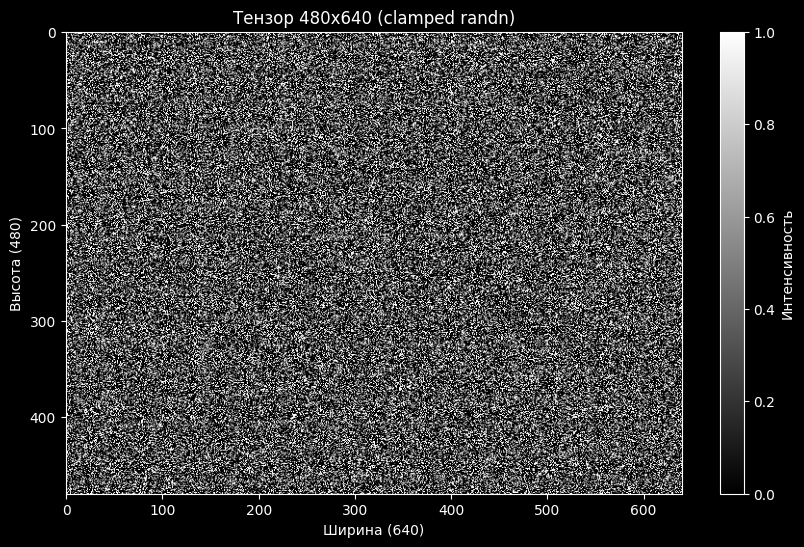

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(image.numpy(), cmap='gray')  # cmap='gray' для черно-белого
plt.colorbar(label='Интенсивность')
plt.title('Тензор 480x640 (clamped randn)')
plt.xlabel('Ширина (640)')
plt.ylabel('Высота (480)')
plt.show()

In [7]:
image

tensor([[0.6348, 0.0000, 0.0000,  ..., 0.0000, 0.8568, 0.0000],
        [0.0000, 0.0000, 1.0000,  ..., 0.2300, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.4213,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 1.0000,  ..., 0.1730, 0.6479, 1.0000],
        [0.6201, 1.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0486],
        [0.0000, 0.5420, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [8]:
unfold = torch.nn.Unfold(kernel_size=20, stride=20, padding=0)

In [9]:
unfold

Unfold(kernel_size=20, dilation=1, padding=0, stride=20)

In [10]:
image = image.unsqueeze(0).unsqueeze(0)

In [11]:
image.shape

torch.Size([1, 1, 480, 640])

In [12]:
a = unfold(image)

In [13]:
a.shape

torch.Size([1, 400, 768])

In [14]:
a[0, :, 0]

tensor([0.6348, 0.0000, 0.0000, 0.1117, 0.2263, 0.0000, 0.0000, 0.0000, 1.0000,
        0.4950, 0.3411, 0.0867, 0.0000, 0.2085, 0.0000, 0.0000, 0.6715, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.6752,
        0.0000, 0.6374, 0.0000, 0.0000, 0.0000, 0.6719, 0.0000, 0.6561, 0.6424,
        0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.4213, 0.0000, 0.0000,
        0.4632, 0.0000, 0.0920, 0.2751, 0.7339, 1.0000, 0.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0755, 0.2950,
        0.0000, 0.0000, 1.0000, 0.0000, 0.7148, 0.1278, 0.0000, 0.0000, 0.3460,
        0.3713, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2749, 1.0000, 0.9117,
        0.5046, 0.0000, 0.0000, 0.0000, 0.6991, 0.6949, 0.2503, 0.3928, 0.6307,
        1.0000, 0.0000, 1.0000, 0.2215, 0.0000, 0.2652, 0.0000, 0.0000, 0.0000,
        0.0000, 0.9836, 0.2058, 0.1424, 0.0000, 0.0000, 0.0000, 0.7331, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [15]:
image

tensor([[[[0.6348, 0.0000, 0.0000,  ..., 0.0000, 0.8568, 0.0000],
          [0.0000, 0.0000, 1.0000,  ..., 0.2300, 0.0000, 0.0000],
          [1.0000, 0.0000, 0.4213,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 1.0000,  ..., 0.1730, 0.6479, 1.0000],
          [0.6201, 1.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0486],
          [0.0000, 0.5420, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]])

In [16]:
patches_for_linear = a.permute(0, 2, 1)

In [17]:
patches_for_linear.shape

torch.Size([1, 768, 400])

In [18]:
patches_for_linear[0, 0, :]

tensor([0.6348, 0.0000, 0.0000, 0.1117, 0.2263, 0.0000, 0.0000, 0.0000, 1.0000,
        0.4950, 0.3411, 0.0867, 0.0000, 0.2085, 0.0000, 0.0000, 0.6715, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.6752,
        0.0000, 0.6374, 0.0000, 0.0000, 0.0000, 0.6719, 0.0000, 0.6561, 0.6424,
        0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.4213, 0.0000, 0.0000,
        0.4632, 0.0000, 0.0920, 0.2751, 0.7339, 1.0000, 0.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0755, 0.2950,
        0.0000, 0.0000, 1.0000, 0.0000, 0.7148, 0.1278, 0.0000, 0.0000, 0.3460,
        0.3713, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2749, 1.0000, 0.9117,
        0.5046, 0.0000, 0.0000, 0.0000, 0.6991, 0.6949, 0.2503, 0.3928, 0.6307,
        1.0000, 0.0000, 1.0000, 0.2215, 0.0000, 0.2652, 0.0000, 0.0000, 0.0000,
        0.0000, 0.9836, 0.2058, 0.1424, 0.0000, 0.0000, 0.0000, 0.7331, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [19]:
import torch.nn as nn

In [20]:
class Encoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w_emb = torch.nn.Parameter(torch.randn(400, 256))
    def make_embeddings(self, x):
        return x @ self.w_emb




In [21]:
enc = Encoder()
enc.w_emb.shape

torch.Size([400, 256])

In [22]:
enc.w_emb.grad

In [23]:
patches_for_linear.shape

torch.Size([1, 768, 400])

In [24]:
rez = enc.make_embeddings(patches_for_linear)

In [25]:
rez

tensor([[[-24.0383,   8.2580,  -1.0433,  ...,  -6.5566,  -7.9337,   3.3515],
         [-17.0825,  18.9023,  -1.1566,  ..., -47.7661,   7.6307, -10.0423],
         [ -5.4248,   1.6360,   4.6915,  ...,  -4.5137,  15.1265,  -9.0822],
         ...,
         [-11.9516,  23.7037,   1.7214,  ..., -12.0645,   3.6613,   6.0048],
         [ -4.5259,  14.8194,   1.7437,  ...,  -1.1965,   3.8707,  -7.0314],
         [-15.2559,   1.8685, -15.0839,  ..., -15.9680,  -4.1561,   9.1914]]],
       grad_fn=<UnsafeViewBackward0>)

In [26]:
rez.shape

torch.Size([1, 768, 256])

In [28]:
enc.w_emb.requires_grad

True